___
# Ciência dos Dados - PROJETO 1

### Pedro Isidoro Maciel
___

# Internet Para Todos?

___
## Introdução

   Atualmente a internet se encontra em um patamar de alta importância para uma formação ideal de um cidadão, devido às suas qualidades que permitem de modo geral facilitar o aprendizado e um entendimento de mundo que resultam em uma maior esclarecimento de toda a população. Baseando-se nisso, este trabalho, ao tomar como base as PNAD's dos anos de 2013 e 2015, pretende realizar um estudo sobre como se dá a utilização da internet nas regiões Norte (menos desenvolvida do país) e Sudeste (mais desenvolvida do país), considerando apenas a população de baixa renda. Além disso, vale verificar se este acesso se dá ainda principalmente por meio de computadores, ou se o celular já os ultrapassou.

___
## Análise e Resultados

In [128]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [129]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())


Esperamos trabalhar no diretório
C:\Users\pedro\Documents\2 SEMESTRE\Ciencia dos Dados\Projeto 1


In [130]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [131]:
dados = pd.read_csv('DOM2015.csv',sep=',')
ano = pd.read_csv('DOM2013.csv',sep=',')

In [132]:
# REGIAO 
dados.loc[(dados.UF>30)&(dados.UF<36), 'REGIAO'] = 'Sudeste'
dados.loc[(dados.UF>35)&(dados.UF<44), 'REGIAO'] = 'Sul'
dados.loc[(dados.UF>43)&(dados.UF<54), 'REGIAO'] = 'Centro-Oeste'
dados.loc[(dados.UF>10)&(dados.UF<23), 'REGIAO'] = 'Norte'
dados.loc[(dados.UF>22)&(dados.UF<31), 'REGIAO'] = 'Nordeste'                              


#RENDIMENTO MENSAL DOMCILIAR PER CAPITA (R$)
dados.loc[(dados.V4622>-1)&(dados.V4622<3), 'Faixa_Salarial'] = 'Até 1/2 Salário'


# TEM INTERNET NO DOMICILIO ?
dados.V02322 = dados.V02322.astype('category')

dados.loc[(dados.V02322 == 2), 'INTERNET_NO_DOMICILIO'] = 'Sim'
dados.loc[(dados.V02322 == 4), 'INTERNET_NO_DOMICILIO'] = 'Não'


# ACESSA PELO Telefone Celular
dados.V02324 = dados.V02324.astype('category')
dados.V02324.cat.categories = ('Sim', 'Não')

dados.loc[(dados.V02324 == 2), 'PELO_CELULAR'] = 'Sim'
dados.loc[(dados.V02324 == 4), 'PELO_CELULAR'] = 'Não'


#ACESSA PELO COMPUTADOR
dados.V0232 = dados.V0232.astype('category')
dados.V0232.cat.categories = ('Sim', 'Não')

dados.loc[(dados.V0232 == 2), 'PELO_PC'] = 'Sim'
dados.loc[(dados.V0232 == 4), 'PELO_PC'] = 'Não'


#dados=dados.dropna(subset = ["variavel"])


# Começamos analisando a região Sudeste, a partir de uma população de baixíssima renda (até 1/2 salário mínimo).

In [133]:
print("SUDESTE")
print("ANALISANDO A POPULAÇAÕ COM UMA RENDA DOMICILIAR DE ATÉ 1 SALÁRIO MÍNIMO")

baixarenda_SUDESTE = dados[  (dados.Faixa_Salarial== 'Até 1/2 Salário') & (dados.REGIAO =='Sudeste')].loc[:,[ 'REGIAO', 'INTERNET_NO_DOMICILIO', 'Faixa_Salarial' ]]
baixarenda_SUDESTE.head()

SUDESTE
ANALISANDO A POPULAÇAÕ COM UMA RENDA DOMICILIAR DE ATÉ 1 SALÁRIO MÍNIMO


,REGIAO,INTERNET_NO_DOMICILIO,Faixa_Salarial
64884,Sudeste,Sim,Até 1/2 Salário
64889,Sudeste,Sim,Até 1/2 Salário
64902,Sudeste,Sim,Até 1/2 Salário
64904,Sudeste,Não,Até 1/2 Salário
64915,Sudeste,Não,Até 1/2 Salário


In [134]:
print("SUDESTE - QUANTOS POSSUEM ACESSO A INTERNET EM CASA")
ut1 = (baixarenda_SUDESTE.INTERNET_NO_DOMICILIO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut1


SUDESTE - QUANTOS POSSUEM ACESSO A INTERNET EM CASA


Não    50.4
Sim    49.6
Name: INTERNET_NO_DOMICILIO, dtype: float64

# Verificando a forma do acesso. Ou seja, de todos que possuem acesso à internet, quantos porcento acessam pelo computador e quantos % acessam pelo celular.

( Já peço desculpas por não conseguir nomear as variaveis V0232 e V02324, mas acontece um erro que eu não consigo identificar de maneira alguma, considerando que o código é o mesmo utilizado para renomear outras variaveis)

In [135]:
forma_SUDESTE = dados[  (dados.Faixa_Salarial== 'Até 1/2 Salário') & (dados.REGIAO =='Sudeste') & (dados.INTERNET_NO_DOMICILIO =='Sim')].loc[:,['REGIAO','INTERNET_NO_DOMICILIO', 'V0232', 'V02324']]
forma_SUDESTE.head()

,REGIAO,INTERNET_NO_DOMICILIO,V0232,V02324
64884,Sudeste,Sim,Sim,Sim
64889,Sudeste,Sim,Sim,Sim
64902,Sudeste,Sim,Sim,Sim
64977,Sudeste,Sim,NaN,Sim
64985,Sudeste,Sim,Sim,Sim


# O mesmo para a região Norte...

In [136]:
baixarenda_NORTE = dados[  (dados.Faixa_Salarial== 'Até 1/2 Salário') & (dados.REGIAO =='Norte')].loc[:,[ 'REGIAO', 'INTERNET_NO_DOMICILIO', 'Faixa_Salarial' ]]
baixarenda_NORTE.head()


,REGIAO,INTERNET_NO_DOMICILIO,Faixa_Salarial
6,Norte,Não,Até 1/2 Salário
32,Norte,Sim,Até 1/2 Salário
33,Norte,Sim,Até 1/2 Salário
35,Norte,Não,Até 1/2 Salário
36,Norte,Não,Até 1/2 Salário


In [137]:
print("NORTE - QUANTOS POSSUEM ACESSO A INTERNET EM CASA")
ut2 = (baixarenda_NORTE.INTERNET_NO_DOMICILIO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut2


NORTE - QUANTOS POSSUEM ACESSO A INTERNET EM CASA


Não    67.9
Sim    32.1
Name: INTERNET_NO_DOMICILIO, dtype: float64

In [138]:
forma_NORTE = dados[  (dados.Faixa_Salarial== 'Até 1/2 Salário') & (dados.REGIAO =='Norte') & (dados.INTERNET_NO_DOMICILIO =='Sim')].loc[:,['REGIAO','INTERNET_NO_DOMICILIO', 'V0232', 'V02324']]
forma_NORTE.head()

,REGIAO,INTERNET_NO_DOMICILIO,V0232,V02324
32,Norte,Sim,Sim,Não
33,Norte,Sim,Sim,Não
39,Norte,Sim,Sim,Sim
87,Norte,Sim,Sim,Sim
97,Norte,Sim,NaN,Sim


# Os gráficos de pizza indicam que, no ano de 2015 49.6 % da população do sudeste, com até 1/2 salário mínimo, possuem acesso a internet. Enquanto no Norte, apenas 32.1 % dos mesmo possuem acesso.

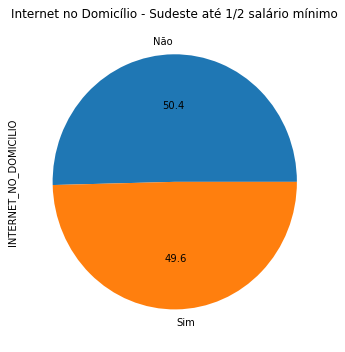

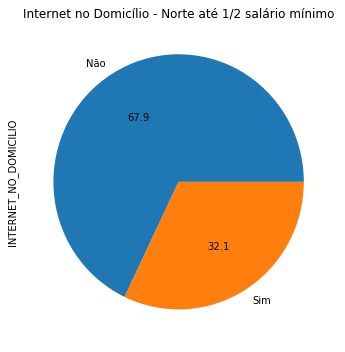

In [139]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut1.plot(kind='pie',title='Internet no Domicílio - Sudeste até 1/2 salário mínimo',autopct='%.1f')


plt.tight_layout()
plt.show()



fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut2.plot(kind='pie',title='Internet no Domicílio - Norte até 1/2 salário mínimo',autopct='%.1f')


plt.tight_layout()
plt.show()


# Verificando a frequência relativa das pessoas que acessam internet pelo PC ou pelo Celular, de um total de pessoas que possuem internet.


# A tabela (crosstab) e o gráfico de barras indicam que, na região sudeste, 88.9 % da população de baixíssima renda, que acessa a internet em casa, realiza o acesso pelo computador. E 91.4 % acessam pelo celular. Ou seja, grande parte possui ambos os equipamentos.


In [140]:

print("Entre todos que tem internet no sudeste, quantos % acessam pelo computador")
sudestePC=(pd.crosstab([forma_SUDESTE.REGIAO, forma_SUDESTE.INTERNET_NO_DOMICILIO],forma_SUDESTE.V0232, normalize='index')*100).round(decimals=1)
sudestePC





Entre todos que tem internet no sudeste, quantos % acessam pelo computador


,V0232,Sim,Não
REGIAO,INTERNET_NO_DOMICILIO,,
Sudeste,Sim,88.9,11.1


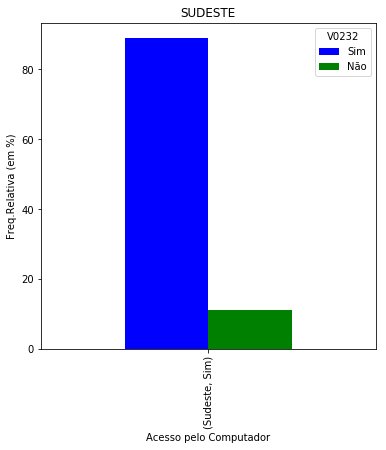

In [141]:
plot = sudestePC.plot(kind='bar',title='SUDESTE',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Acesso pelo Computador')





In [142]:
print("Entre todos que tem internet no sudeste, quantos % acessam pelo celular")
sudesteCEL=(pd.crosstab([forma_SUDESTE.REGIAO, forma_SUDESTE.INTERNET_NO_DOMICILIO],forma_SUDESTE.V02324, normalize='index')*100).round(decimals=1)
sudesteCEL



Entre todos que tem internet no sudeste, quantos % acessam pelo celular


,V02324,Sim,Não
REGIAO,INTERNET_NO_DOMICILIO,,
Sudeste,Sim,91.4,8.6


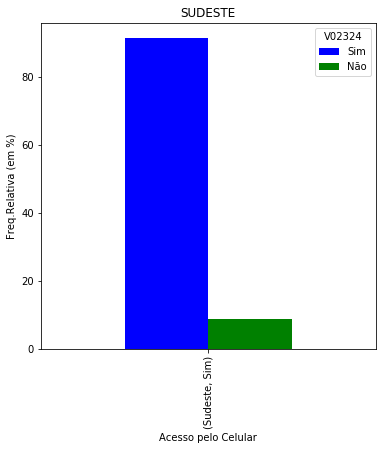

In [143]:
plot = sudesteCEL.plot(kind='bar',title='SUDESTE',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Acesso pelo Celular')

In [144]:
print("Entre todos que tem internet no Norte, quantos % acessam pelo computador")
nortePC=(pd.crosstab([forma_NORTE.REGIAO, forma_NORTE.INTERNET_NO_DOMICILIO],forma_NORTE.V0232, normalize='index')*100).round(decimals=1)
nortePC

Entre todos que tem internet no Norte, quantos % acessam pelo computador


,V0232,Sim,Não
REGIAO,INTERNET_NO_DOMICILIO,,
Norte,Sim,76.4,23.6


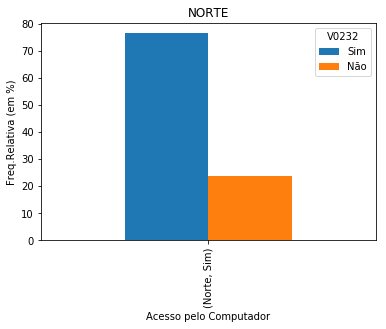

In [145]:
plot = nortePC.plot(kind='bar',title='NORTE')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Acesso pelo Computador')


In [146]:
print("Entre todos que tem internet no Norte, quantos % acessam pelo celular")
norteCEL=(pd.crosstab([forma_NORTE.REGIAO, forma_NORTE.INTERNET_NO_DOMICILIO],forma_NORTE.V02324, normalize='index')*100).round(decimals=1)
norteCEL

Entre todos que tem internet no Norte, quantos % acessam pelo celular


,V02324,Sim,Não
REGIAO,INTERNET_NO_DOMICILIO,,
Norte,Sim,97.3,2.7


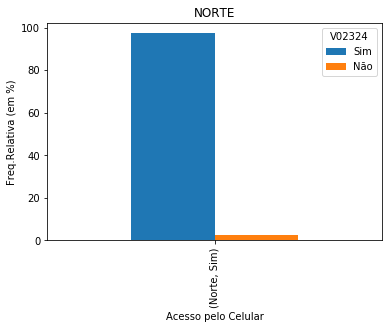

In [147]:
plot = norteCEL.plot(kind='bar',title='NORTE')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Acesso pelo Celular')


# ANO DE 2013

In [148]:
# REGIAO 
ano.loc[(ano.UF>30)&(ano.UF<36), 'REGIAO'] = 'Sudeste'
ano.loc[(ano.UF>35)&(ano.UF<44), 'REGIAO'] = 'Sul'
ano.loc[(ano.UF>43)&(ano.UF<54), 'REGIAO'] = 'Centro-Oeste'
ano.loc[(ano.UF>10)&(ano.UF<23), 'REGIAO'] = 'Norte'
ano.loc[(ano.UF>22)&(ano.UF<31), 'REGIAO'] = 'Nordeste'                              


#RENDIMENTO MENSAL DOMCILIAR PER CAPITA (R$)

ano.loc[(ano.V4622>-1)&(ano.V4622<3), 'Faixa_Salarial'] = 'Até meio salario'



# TEM INTERNET NO DOMICILIO ?
ano.V02322 = ano.V02322.astype('category')

ano.loc[(ano.V02322 == 2), 'INTERNET_NO_DOMICILIO'] = 'Sim'
ano.loc[(ano.V02322 == 4), 'INTERNET_NO_DOMICILIO'] = 'Não'


# ACESSA PELO Telefone Celular
ano.V02324 = ano.V02324.astype('category')
ano.V02324.cat.categories = ('Sim', 'Não')

ano.loc[(ano.V02324 == 2), 'PELO_CELULAR'] = 'Sim'
ano.loc[(ano.V02324 == 4), 'PELO_CELULAR'] = 'Não'


#ACESSA PELO COMPUTADOR
ano.V0232 = ano.V0232.astype('category')
ano.V0232.cat.categories = ('Sim', 'Não')

ano.loc[(ano.V0232 == 2), 'PELO_PC'] = 'Sim'
ano.loc[(ano.V0232 == 4), 'PELO_PC'] = 'Não'


In [149]:
print("SUDESTE")
print("ANALISANDO A POPULAÇAÕ COM UMA RENDA DOMICILIAR DE ATÉ 1/2 SALÁRIO MÍNIMO")

baixarenda_SUDESTE13 = ano[ (ano.Faixa_Salarial== 'Até meio salario') & (ano.REGIAO =='Sudeste')].loc[:,['Faixa_Salarial', 'INTERNET_NO_DOMICILIO', 'V0232', 'V02324' ]]
baixarenda_SUDESTE13.head()

SUDESTE
ANALISANDO A POPULAÇAÕ COM UMA RENDA DOMICILIAR DE ATÉ 1/2 SALÁRIO MÍNIMO


,Faixa_Salarial,INTERNET_NO_DOMICILIO,V0232,V02324
63847,Até meio salario,Não,NaN,NaN
63855,Até meio salario,Não,Não,NaN
63858,Até meio salario,Não,NaN,NaN
63874,Até meio salario,Não,Não,NaN
63877,Até meio salario,Não,NaN,NaN


In [150]:
print("SUDESTE - QUANTOS POSSUEM ACESSO A INTERNET EM CASA")
ut13 = (baixarenda_SUDESTE13.INTERNET_NO_DOMICILIO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut13

SUDESTE - QUANTOS POSSUEM ACESSO A INTERNET EM CASA


Não    66.4
Sim    33.6
Name: INTERNET_NO_DOMICILIO, dtype: float64

In [156]:
forma_SUDESTE13 = ano[  (ano.Faixa_Salarial== 'Até meio salario') & (ano.REGIAO =='Sudeste') & (ano.INTERNET_NO_DOMICILIO =='Sim')].loc[:,['REGIAO','INTERNET_NO_DOMICILIO', 'V0232', 'V02324', 'Faixa_Salarial']]
forma_SUDESTE13.tail()

,REGIAO,INTERNET_NO_DOMICILIO,V0232,V02324,Faixa_Salarial
108467,Sudeste,Sim,NaN,Sim,Até meio salario
108473,Sudeste,Sim,Sim,Não,Até meio salario
108545,Sudeste,Sim,Sim,Não,Até meio salario
108563,Sudeste,Sim,Sim,Não,Até meio salario
108569,Sudeste,Sim,Sim,Sim,Até meio salario


In [157]:
baixarenda_NORTE13 = ano[  (ano.Faixa_Salarial== 'Até meio salario') & (ano.REGIAO =='Norte')].loc[:,[ 'REGIAO', 'INTERNET_NO_DOMICILIO', 'Faixa_Salarial' ]]
baixarenda_NORTE13.head()


,REGIAO,INTERNET_NO_DOMICILIO,Faixa_Salarial
3,Norte,Não,Até meio salario
4,Norte,Não,Até meio salario
10,Norte,Não,Até meio salario
11,Norte,Não,Até meio salario
26,Norte,Não,Até meio salario


In [158]:
print("NORTE - QUANTOS POSSUEM ACESSO A INTERNET EM CASA")
ut14 = (baixarenda_NORTE13.INTERNET_NO_DOMICILIO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut14

NORTE - QUANTOS POSSUEM ACESSO A INTERNET EM CASA


Não    80.3
Sim    19.7
Name: INTERNET_NO_DOMICILIO, dtype: float64

In [159]:
forma_NORTE13 = ano[  (ano.Faixa_Salarial== 'Até meio salario') & (ano.REGIAO =='Norte') & (ano.INTERNET_NO_DOMICILIO =='Sim')].loc[:,['REGIAO','INTERNET_NO_DOMICILIO', 'V0232', 'V02324']]
forma_NORTE13.head()

,REGIAO,INTERNET_NO_DOMICILIO,V0232,V02324
43,Norte,Sim,Sim,Não
51,Norte,Sim,NaN,Sim
53,Norte,Sim,Sim,Sim
84,Norte,Sim,Sim,Não
85,Norte,Sim,Sim,Não


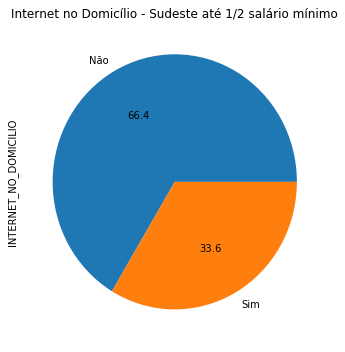

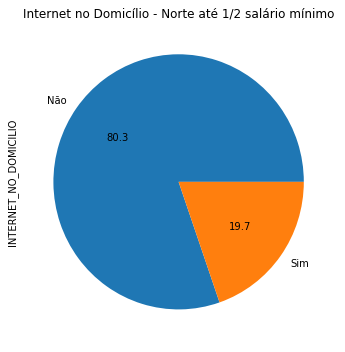

In [160]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut13.plot(kind='pie',title='Internet no Domicílio - Sudeste até 1/2 salário mínimo',autopct='%.1f')


plt.tight_layout()
plt.show()



fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut14.plot(kind='pie',title='Internet no Domicílio - Norte até 1/2 salário mínimo',autopct='%.1f')


plt.tight_layout()
plt.show()

In [161]:
print("Entre todos que tem internet no sudeste, quantos % acessam pelo computador")
sudestePC13=(pd.crosstab([forma_SUDESTE13.REGIAO, forma_SUDESTE13.INTERNET_NO_DOMICILIO],forma_SUDESTE13.V0232, normalize='index')*100).round(decimals=1)
sudestePC13



Entre todos que tem internet no sudeste, quantos % acessam pelo computador


,V0232,Sim,Não
REGIAO,INTERNET_NO_DOMICILIO,,
Sudeste,Sim,95.5,4.5


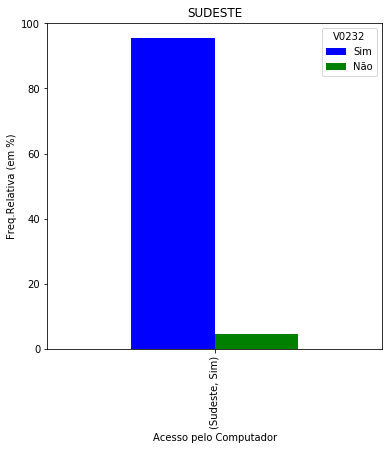

In [162]:
plot = sudestePC13.plot(kind='bar',title='SUDESTE',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Acesso pelo Computador')


In [163]:
print("Entre todos que tem internet no sudeste, quantos % acessam pelo celular")
sudesteCEL13=(pd.crosstab([forma_SUDESTE13.REGIAO, forma_SUDESTE13.INTERNET_NO_DOMICILIO],forma_SUDESTE13.V02324, normalize='index')*100).round(decimals=1)
sudesteCEL13

Entre todos que tem internet no sudeste, quantos % acessam pelo celular


,V02324,Sim,Não
REGIAO,INTERNET_NO_DOMICILIO,,
Sudeste,Sim,47.2,52.8


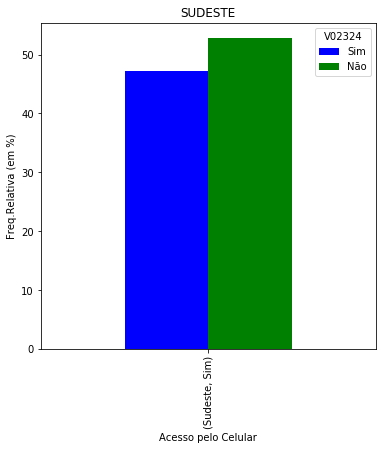

In [164]:
plot = sudesteCEL13.plot(kind='bar',title='SUDESTE',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Acesso pelo Celular')

In [165]:
print("Entre todos que tem internet no Norte, quantos % acessam pelo computador")
nortePC13=(pd.crosstab([forma_NORTE13.REGIAO, forma_NORTE13.INTERNET_NO_DOMICILIO],forma_NORTE13.V0232, normalize='index')*100).round(decimals=1)
nortePC13

Entre todos que tem internet no Norte, quantos % acessam pelo computador


,V0232,Sim,Não
REGIAO,INTERNET_NO_DOMICILIO,,
Norte,Sim,85.9,14.1


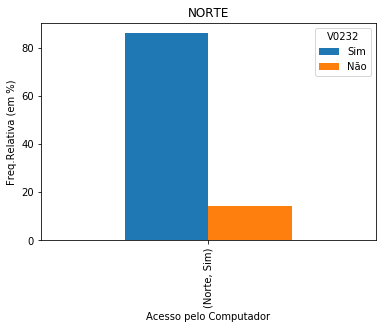

In [166]:
plot = nortePC13.plot(kind='bar',title='NORTE')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Acesso pelo Computador')


In [167]:
print("Entre todos que tem internet no Norte, quantos % acessam pelo celular")
norteCEL13=(pd.crosstab([forma_NORTE13.REGIAO, forma_NORTE13.INTERNET_NO_DOMICILIO],forma_NORTE13.V02324, normalize='index')*100).round(decimals=1)
norteCEL13

Entre todos que tem internet no Norte, quantos % acessam pelo celular


,V02324,Sim,Não
REGIAO,INTERNET_NO_DOMICILIO,,
Norte,Sim,78.2,21.8


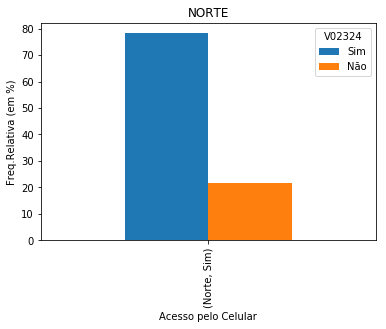

In [168]:
plot = norteCEL13.plot(kind='bar',title='NORTE')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Acesso pelo Celular')

___
## Conclusão 

   A partir dos resultados obtidos é possível inferir que a diferença entre o nível de desenvolvimento sócio-econômico entre as regiões norte e sudeste influencia no acesso a internet da população de baixa renda em ambos os anos. Podendo também notar uma evolução de grau semelhante na frequencia relativa de pessoas que têm este acesso, em relação ao todo, tambem em ambas, de 2013 para 2015. Ou seja, as duas regiões apresentaram uma evolução, porém mantendo suas diferenças.
   Já no âmbito da forma de acesso a internet, fica claro que em ambas as regiões, o celular evoluiu em uma quantidade consideravelmente alta em relação ao computador, neste período de 2 anos. O que indica que o mesmo tende, em um futuro próximo, a dominar o acesso a internet, anteriormente dominado pelos computadores.
   Para finalizar, este estudo indica que ainda hoje, a internet, de papel tão importante para o desenvolvimento humano, não é absoluta nas camadas mais pobres do país, fato que se agrava em regiões menos desenvolvidas, como a região norte. Conclui-se assim que medidas devem ser tomadas para que haja uma maior democratização no acesso à este bem.
    